Let's use the data set from the lecture:

|**Aircraft name** | **Distance range (km)** | **Seats count** | **Aircraft type** |
|------------------|-------------------------|-----------------|-------------------|
| Cesna 510 Mustang| 1940                    |             4   | private jet       |
| Falcon 10/100    | 2960                    |             9   | private jet       |
| Hawker 900/900XP | 4630                    |             9   | private jet       |
| ATR 72-600       | 1528                    |            78   | medium size aircraft|
| Bombardier Dash 8 Q400 | 2040              |            90   | medium size aircraft|
| Embraer ERJ145 XR| 3700                    |            50   | medium size aircraft|
| Boeing 747-8     | 14815                   |           467   | jet airliner      |
| A380-800         | 15200                   |           509   | jet airliner      |
| Boeing 787-8     | 15700                   |           290   | jet airliner      |
| Boeing 737-900ER | 6045                    |           215   | jet airliner      | 


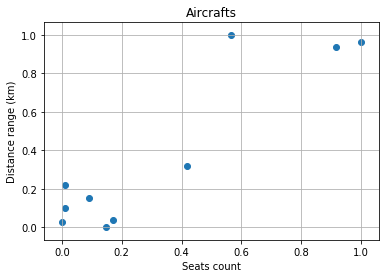

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# dataset
X = np.array([(4, 1940), (9, 2960),
              (9, 4630), (78, 1528),
              (90, 2040), (50, 3700),
              (467, 14815), (509, 15200),
              (290, 15700), (215, 6045)])

# normalize the dataset
min_values, max_values = 1.0 * X.min(0), 1.0 * X.max(0)
X_norm = (X - min_values) / (max_values - min_values)

plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.xlabel('Seats count'); plt.ylabel('Distance range (km)'); plt.title('Aircrafts')
plt.grid()

plt.show()

In [4]:
data_set = X_norm
# number of clusters
groups = 3
# feature space (normalized space)
space = [[0, 1],
         [0, 1]]

error_margin = 0.01
m = 2 # the number of features

# assignation matrix
assignation = np.zeros((len(data_set), groups))
# centroids defined as tuples representing the coordinates
centroids = np.array([])

# euclidean distance definition
def euclidean_distance(x, v):
    return (sum([(x[i] - v[i]) ** 2
                 for i in range(len(x))])) ** 0.5

In [39]:
# centroids generation
def generate_centroids():
    global centroids
    global data_set
#     global groups
#     global space
#     centroids = []
#     for _ in range(groups):
#         centroids.append((np.random.uniform(space[0][0], space[0][1]), 
#                           np.random.uniform(space[1][0], space[1][1])))
#     centroids = np.array(centroids)
    # choose randomly from the dataset
    centroids = data_set[np.random.choice(len(data_set), size=groups)]
    
generate_centroids()
print(centroids)

[[0.56633663 1.        ]
 [0.         0.02907141]
 [1.         0.96471916]]


In [6]:
# column elements for the assignation matrix
def calculate_u(x):
    # x - a dataset entry
    global centroids, groups
    u_array = np.zeros(groups)
    distances = []
    for group in range(groups):
        distances.append(euclidean_distance(x, centroids[group]))
    min_id = np.argmin(distances)
    u_array[min_id] = 1
    return u_array

assignation = np.array([calculate_u(d) for d in data_set])
print(assignation)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [7]:
# calculate centroids for the assignation matrix
def new_centroids(U):
    # U - an assignation matrix
    global centroids, data_set, m
    centroids = []
    for group in range(groups):
        u_x_vector = np.zeros(m)
        u_scalar = 0.0
        for i in range(len(data_set)):
            u_scalar += U[i][group]
            u_x_vector = np.add(u_x_vector, np.multiply(U[i][group], data_set[i]))
        # print(u_scalar, u_x_vector)
        centroids.append(np.divide(u_x_vector, u_scalar))
    centroids = np.array(centroids)

new_centroids(assignation)
print(centroids)

[[0.05214521 0.04337191]
 [0.09042904 0.13608994]
 [0.72524752 0.80524979]]


In [8]:
# calculate the cumulative differences between the new and previous assignation matrices
def assign_dif(new_assignation):
    global assignation
    return np.sum(np.abs(np.subtract(assignation, new_assignation)))

print(assign_dif(assignation))

0.0


In [9]:
from copy import deepcopy

def cluster():
    global data_set, groups
    global centroids, assignation
    global error_margin
    
    assignation = np.zeros((len(data_set), groups))
    generate_centroids()
    
    difference_limit_not_achieved = True
    iter = 0
    
    while difference_limit_not_achieved:
        new_assignation = np.array([calculate_u(d)
                                    for d in data_set])
        new_centroids(new_assignation)

        if iter > 0:
            if assign_dif(new_assignation) < error_margin:
                difference_limit_not_achieved = False

        assignation = deepcopy(new_assignation)
        iter += 1

cluster()
print(centroids)
print(assignation)

[[0.02772277 0.12556449]
 [0.24488449 0.11828488]
 [0.82772277 0.96742403]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


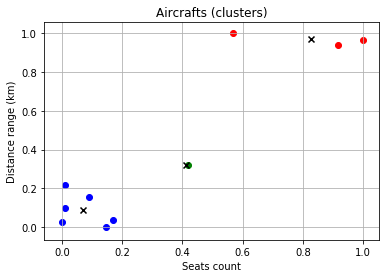

In [38]:
red = X_norm[np.where(np.array(assignation)[:, 0] == 1)]
blue = X_norm[np.where(np.array(assignation)[:, 1] == 1)]
green = X_norm[np.where(np.array(assignation)[:, 2] == 1)]

plt.scatter(blue[:, 0], blue[:, 1], color='blue')
plt.scatter(red[:, 0], red[:, 1], color='red')
plt.scatter(green[:, 0], green[:, 1], color='green')

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x')
plt.xlabel('Seats count')
plt.ylabel('Distance range (km)')
plt.title('Aircrafts (clusters)')
plt.grid()
plt.show()

### Homework: Implement possibilistic k-means

Goal:
1. Implement the mahalanobis_distance function.
2. Implement the calculate_eta function.
3. Implement the calculate_u.

In [17]:
data_set = X_norm
groups = 3
error_margin = 0.01
m = 2 # the number of features

# assignation matrix
assignation = np.zeros((len(data_set), groups))
# centroids defined as tuples representing the coordinates
centroids = np.array([])

In [46]:
# mahalanobis distance definition
# asserting there's no covariance between entries' features
def mahalanobis_distance(x, v):
    return (x - v).T.dot(np.eye(m)).dot(x - v) ** 0.5

# matrix normalization
def normalize(U):
    U_norm = []
    for u in U:
        U_min, U_max = u.min(), u.max()
        U_norm.append((u - U_min) / (U_max - U_min))
    return np.array(U_norm)

In [47]:
# possibilistic distribution measure
def calculate_eta(U, idx):
    # U - assignation matrix
    # idx - the entry index
    global groups, m
    global data_set, centroids
    
    nom, denom = 0.0, 0.0
    for i in range(groups):
        d = mahalanobis_distance(data_set[idx], centroids[i])
        nom += U[idx, i] ** m * d ** 2
        denom += U[idx, i] ** m
        
    return nom / denom

In [48]:
# row elements for the assignation matrix
def calculate_u_pos(U, idx):
    # U - an assignation matrix
    # idx - the entry index
    global data_set
    global groups, m
    global centroids
    
    eta = calculate_eta(U, idx)
    u_row = []
    for i in range(groups):
        d = mahalanobis_distance(data_set[idx], centroids[i])
        u_row.append(1.0 / (1 + (1.0 * d / eta) ** (2.0 / (m - 1))))
    
    return np.array(u_row)

In [49]:
# calculate centroids for the given assignation matrix
def new_centroids_pos(U):
    # U - an assignation matrix
    global centroids
    global groups, m
    global data_set
    centroids = []
    for group in range(groups):
        u_x_vector = np.zeros(m)
        u_scalar = 0.0
        for i in range(len(data_set)):
            u_scalar += U[i, group] ** m
            u_x_vector = np.add(u_x_vector, np.multiply(U[i][group] ** m, data_set[i]))
        centroids.append(np.divide(u_x_vector, u_scalar))
    centroids = np.array(centroids)

In [50]:
def cluster_possibilistic():
    global data_set, groups
    global centroids, assignation
    global error_margin
    
    assignation = np.random.rand(len(data_set), groups)
    generate_centroids()
    
    difference_limit_not_achieved = True
    iter = 0
    
    while difference_limit_not_achieved:
        new_assignation = np.array([calculate_u_pos(assignation, i)
                                    for i in range(len(data_set))])
        new_assignation = normalize(new_assignation)
        new_centroids_pos(new_assignation)
        
        if iter > 0:
            if assign_dif(new_assignation) < error_margin:
                difference_limit_not_achieved = False

        assignation = deepcopy(new_assignation)
        iter += 1

[[0.12079208 0.12244466]
 [0.56445976 0.99117249]
 [0.9584158  0.95113605]]
[[1.00000000e+00 5.76844739e-03 0.00000000e+00]
 [1.00000000e+00 3.81820222e-03 0.00000000e+00]
 [1.00000000e+00 9.19039994e-03 0.00000000e+00]
 [1.00000000e+00 3.61708970e-03 0.00000000e+00]
 [1.00000000e+00 2.53309513e-03 0.00000000e+00]
 [1.00000000e+00 6.62150915e-04 0.00000000e+00]
 [0.00000000e+00 1.36342764e-02 1.00000000e+00]
 [0.00000000e+00 8.78654924e-03 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 4.66965520e-04]
 [1.00000000e+00 1.13651947e-01 0.00000000e+00]]


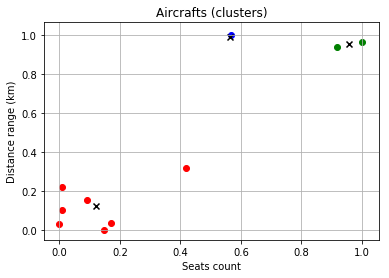

In [55]:
cluster_possibilistic()
print(centroids)
print(assignation)

red = X_norm[np.where(np.array(assignation)[:, 0] == 1)]
blue = X_norm[np.where(np.array(assignation)[:, 1] == 1)]
green = X_norm[np.where(np.array(assignation)[:, 2] == 1)]

plt.scatter(blue[:, 0], blue[:, 1], color='blue')
plt.scatter(red[:, 0], red[:, 1], color='red')
plt.scatter(green[:, 0], green[:, 1], color='green')

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x')
plt.xlabel('Seats count')
plt.ylabel('Distance range (km)')
plt.title('Aircrafts (clusters)')
plt.grid()
plt.show()